In [75]:
import pandas as pd
import json
import os

files = os.listdir("results")

json_files = {}
for file in files:
    with open("results/"+file, "r") as f:
        df = pd.DataFrame(json.load(f))
        idx = file.split("_")[1][3:]
        df["idx"] = int(idx)
        json_files[file] = df

df = pd.concat(json_files.values(), axis = 0)
df

,tensor_location,criterion_score,layer_name,value_before,value_after,idx
0,"[0, 0, 593]",0.7608,class_token,-0.000760,0.000760,0
1,"[0, 0, 67]",0.7608,class_token,-0.000703,0.000703,0
2,"[0, 0, 690]",0.7608,class_token,-0.000758,0.000758,0
3,"[0, 0, 418]",0.7608,class_token,-0.000655,0.000655,0
4,"[0, 0, 583]",0.7608,class_token,-0.000602,0.000602,0
...,...,...,...,...,...,...
1515,[629],0.7608,heads.head.bias,-0.010798,-0.172764,6
1516,[64],0.7608,heads.head.bias,-0.012882,-0.206115,6
1517,[105],0.7608,heads.head.bias,-0.028462,-0.455388,6
1518,[175],0.7608,heads.head.bias,-0.051129,-0.818071,6


In [76]:
df.dtypes

tensor_location     object
criterion_score    float64
layer_name          object
value_before       float64
value_after        float64
idx                  int64
dtype: object

In [77]:
df['tensor_location'] = df['tensor_location'].astype(str).astype('|S') # which will by default set the length to the max len it encounters
df['layer_name'] = df['layer_name'].astype('|S') # which will by default set the length to the max len it encounters
df['idx'] = df['idx'].astype('|S') # which will by default set the length to the max len it encounters
df.dtypes

tensor_location       |S16
criterion_score    float64
layer_name            |S62
value_before       float64
value_after        float64
idx                   |S21
dtype: object

In [78]:
df = df.sort_values(by = ["layer_name", "idx", "tensor_location", "criterion_score"]).reset_index(drop = True)
df

,tensor_location,criterion_score,layer_name,value_before,value_after,idx
0,"b'[0, 0, 107]'",0.7608,b'class_token',0.010280,-0.010280,b'0'
1,"b'[0, 0, 123]'",0.7608,b'class_token',-0.000993,0.000993,b'0'
2,"b'[0, 0, 179]'",0.7610,b'class_token',0.003212,-0.003212,b'0'
3,"b'[0, 0, 198]'",0.7604,b'class_token',-0.015244,0.015244,b'0'
4,"b'[0, 0, 20]'",0.7608,b'class_token',-0.000803,0.000803,b'0'
...,...,...,...,...,...,...
36627,"b'[72, 427]'",0.7608,b'heads.head.weight',0.004210,0.000263,b'6'
36628,"b'[81, 527]'",0.7608,b'heads.head.weight',-0.014841,-0.237464,b'6'
36629,"b'[838, 544]'",0.7610,b'heads.head.weight',0.025741,0.411856,b'6'
36630,"b'[868, 656]'",0.7608,b'heads.head.weight',-0.003590,-0.000224,b'6'


<Axes: xlabel='idx', ylabel='criterion_score'>

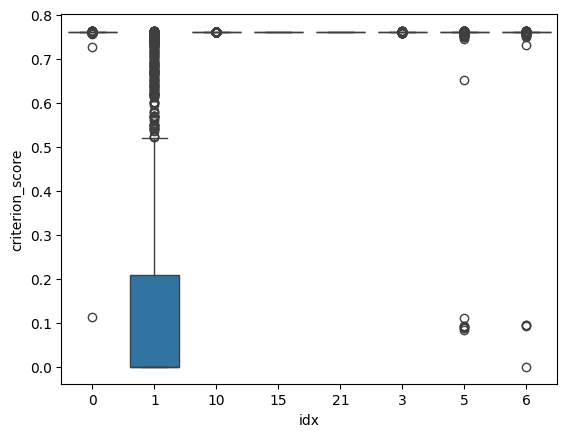

In [79]:
import seaborn as sns

sns.boxplot(data = df, x = "idx", y = "criterion_score")

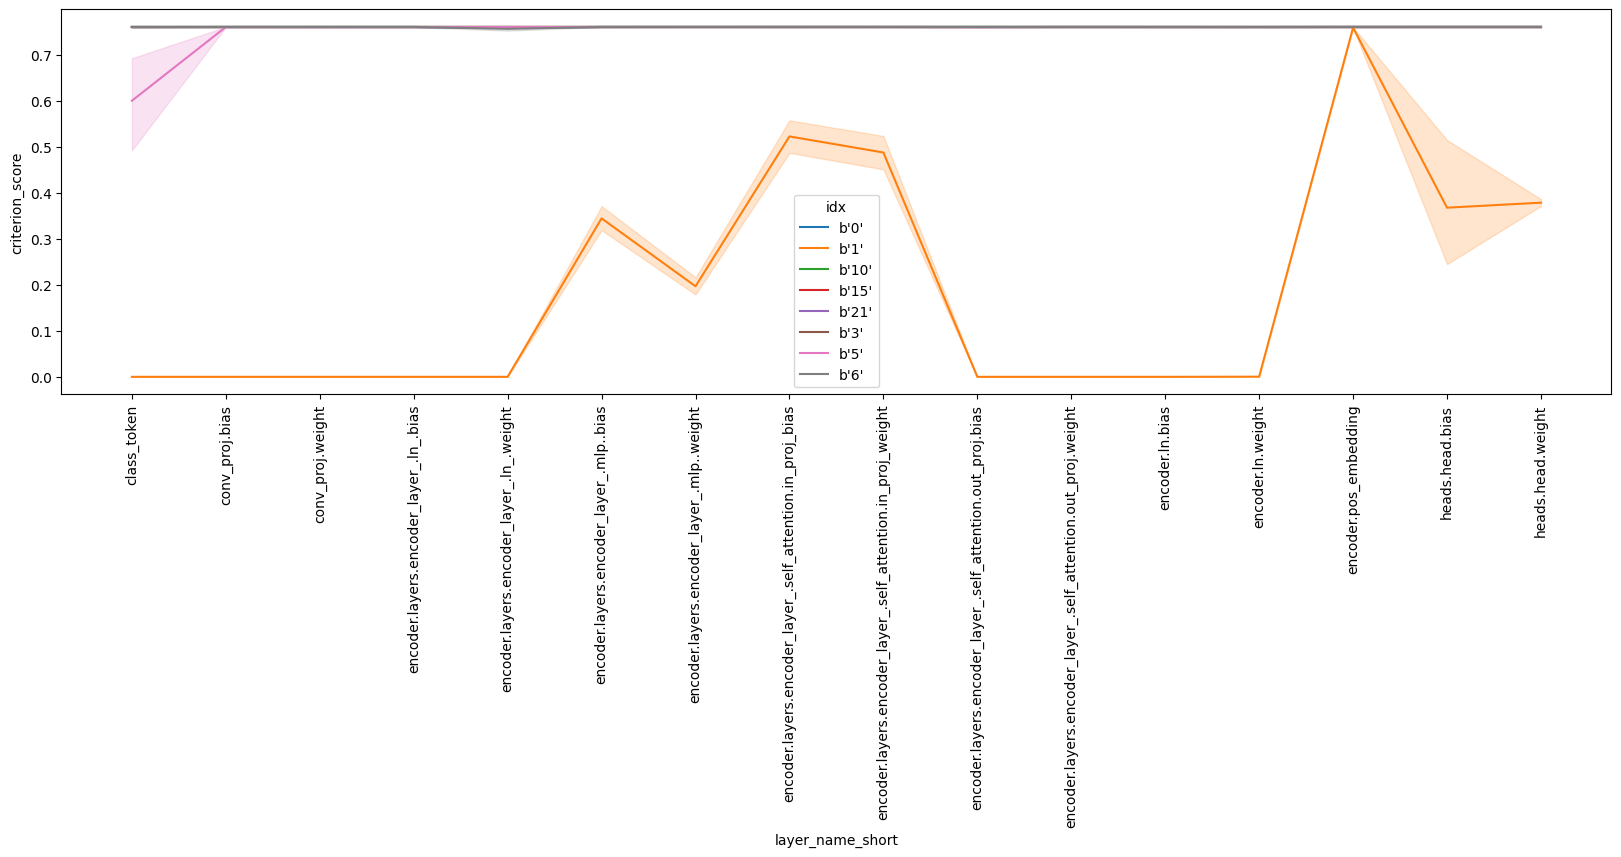

In [80]:
import matplotlib.pyplot as plt

df["layer_name_short"] = df["layer_name"].apply(lambda x: x.decode() if isinstance(x, bytes) else x).str.replace(r'\d+', '', regex=True)


plt.figure(figsize=(20,5))
sns.lineplot(data = df, x = "layer_name_short", y = "criterion_score", hue = "idx")
plt.xticks(rotation = 90)
plt.show()

In [81]:
df["idx"].value_counts()

C:\Users\wwden\AppData\Local\Temp\ipykernel_23332\2608930675.py:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  df["idx"].value_counts()


idx
b'1'     4712
b'0'     4560
b'10'    4560
b'15'    4560
b'21'    4560
b'3'     4560
b'5'     4560
b'6'     4560
Name: count, dtype: int64

c:\Repositories\seu-injection-framework\venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Repositories\seu-injection-framework\venv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\wwden\AppData\Local\Temp\ipykernel_23332\2706411402.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis")


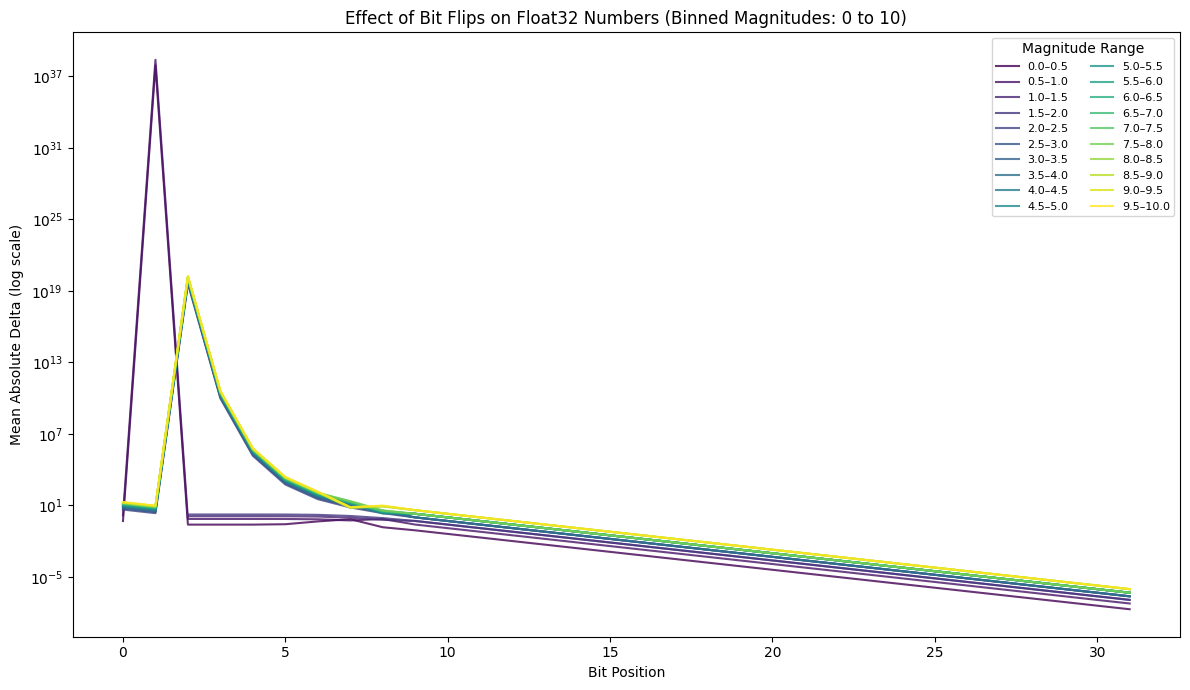

In [ ]:
import numpy as np
import struct
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def bitflip_float32(x, bit_i=np.random.randint(0, 32)):
    if hasattr(x, "__iter__"):
        x_ = np.zeros_like(x, dtype=np.float32)
        for i, item in enumerate(x):
            string = list(float32_to_binary(item))
            string[bit_i] = "0" if string[bit_i] == "1" else "1"
            x_[i] = binary_to_float32("".join(string))
    else:
        string = list(float32_to_binary(x))
        string[bit_i] = "0" if string[bit_i] == "1" else "1"
        x_ = binary_to_float32("".join(string))
    return x_

def float32_to_binary(f):
    [bits] = struct.unpack("!I", struct.pack("!f", f))
    return f"{bits:032b}"

def binary_to_float32(binary_str):
    bits = int(binary_str, 2)
    return struct.unpack("!f", struct.pack("!I", bits))[0]

def assess_deltas(arr, bit_i):
    flipped_arr = np.apply_along_axis(lambda x: bitflip_float32(x, bit_i), axis=0, arr=arr)
    mask = np.isfinite(flipped_arr)
    return np.mean(np.abs(arr[mask] - flipped_arr[mask]))

n = 1000
step = 0.5
edges = np.arange(0, 10, step)
ranges = []
labels = []

for low in edges:
    high = low + step
    magnitudes = np.random.uniform(low + 1e-6, high, size=n)
    signed_vals = magnitudes * np.random.choice([-1, 1], size=n)
    ranges.append(signed_vals)
    labels.append(f"{low}–{high}")

deltas = [[] for _ in ranges]

for i in range(32):
    for j, arr in enumerate(ranges):
        deltas[j].append(assess_deltas(arr, i))

plt.figure(figsize=(12, 7))
cmap = cm.get_cmap("viridis")

for idx, (d, label) in enumerate(zip(deltas, labels)):
    color = cmap(idx / (len(deltas) - 1))
    plt.plot(d, label=label, linewidth=1.5, alpha=0.8, color=color)

plt.yscale("log")
plt.xlabel("Bit Position")
plt.ylabel("Mean Absolute Delta (log scale)")
plt.title("Effect of Bit Flips on Float32 Numbers (Binned Magnitudes: 0 to 10)")
plt.legend(title="Magnitude Range", fontsize=8, ncol=2)
plt.tight_layout()
plt.savefig("bitflips_deltas_gradient_colors.pdf")
plt.show()


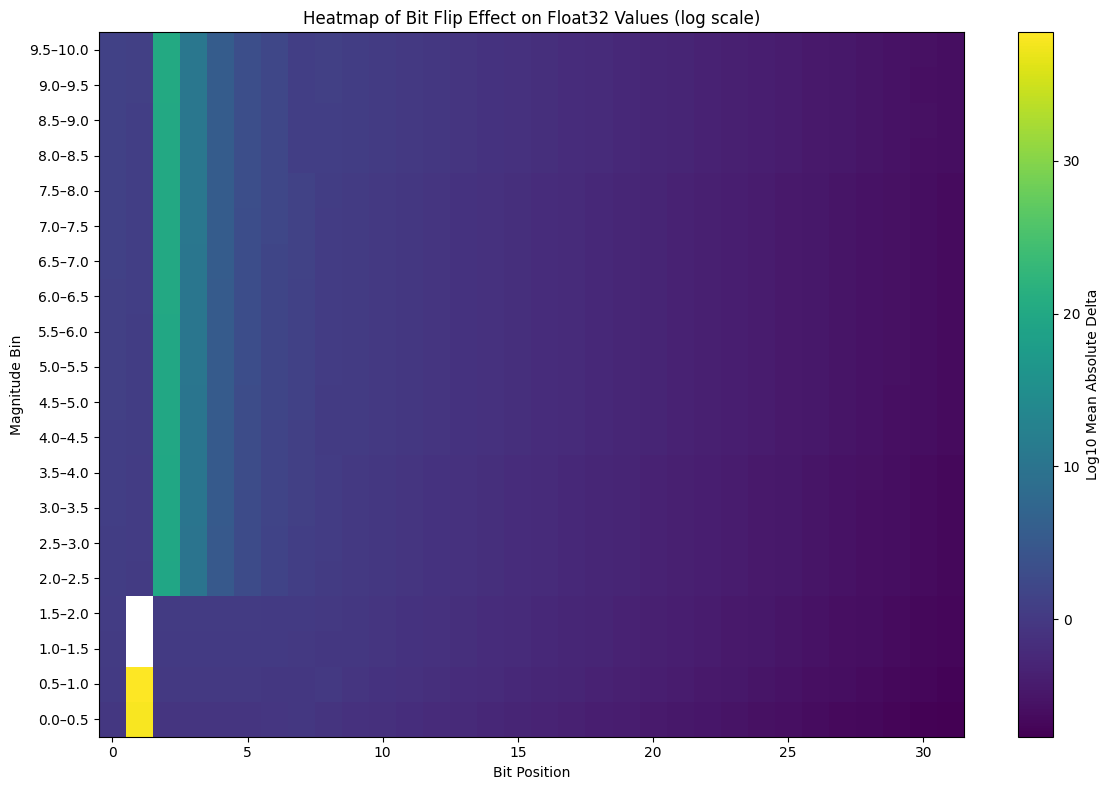

In [144]:
import numpy as np
import struct
import matplotlib.pyplot as plt
import matplotlib.colors as colors

def bitflip_float32(x, bit_i=np.random.randint(0, 32)):
    if hasattr(x, "__iter__"):
        x_ = np.zeros_like(x, dtype=np.float32)
        for i, item in enumerate(x):
            string = list(float32_to_binary(item))
            string[bit_i] = "0" if string[bit_i] == "1" else "1"
            x_[i] = binary_to_float32("".join(string))
    else:
        string = list(float32_to_binary(x))
        string[bit_i] = "0" if string[bit_i] == "1" else "1"
        x_ = binary_to_float32("".join(string))
    return x_

def float32_to_binary(f):
    [bits] = struct.unpack("!I", struct.pack("!f", f))
    return f"{bits:032b}"

def binary_to_float32(binary_str):
    bits = int(binary_str, 2)
    return struct.unpack("!f", struct.pack("!I", bits))[0]

def assess_deltas(arr, bit_i):
    flipped_arr = np.apply_along_axis(lambda x: bitflip_float32(x, bit_i), axis=0, arr=arr)
    mask = np.isfinite(flipped_arr)
    return np.mean(np.abs(arr[mask] - flipped_arr[mask]))

n = 1000
step = 0.5
edges = np.arange(0, 10, step)
ranges = []

for low in edges:
    high = low + step
    magnitudes = np.random.uniform(low + 1e-6, high, size=n)
    signed_vals = magnitudes * np.random.choice([-1, 1], size=n)
    ranges.append(signed_vals)

heatmap_data = np.zeros((len(ranges), 32))

for i in range(32):
    for j, arr in enumerate(ranges):
        heatmap_data[j, i] = assess_deltas(arr, i)

# Add a small epsilon to avoid log(0)
eps = 1e-12
log_heatmap_data = np.log10(heatmap_data + eps)

plt.figure(figsize=(12, 8))
im = plt.imshow(log_heatmap_data, aspect='auto', cmap='viridis', origin='lower')

cbar = plt.colorbar(im)
cbar.set_label('Log10 Mean Absolute Delta')

plt.xlabel('Bit Position')
plt.ylabel('Magnitude Bin')
plt.title('Heatmap of Bit Flip Effect on Float32 Values (log scale)')
plt.yticks(
    ticks=np.arange(len(edges)),
    labels=[f"{low:.1f}–{low+step:.1f}" for low in edges]
)
plt.tight_layout()
plt.savefig("bitflips_deltas_heatmap_log.pdf")
plt.show()

